# Comparación Rendimiento Cython vs. Python

<h3>-Autor: Julian Cardenas
-Universidad: Sergio Arboleda
-Programa: Ciencias de la Computacion e Inteligencia Artificial
-Materia: Computacion Paralela y Distribuida
-Fecha: 11/2022</h3>

<h3>Contexto y Algoritmos</h3>
Cython fue creado con el fin de mejorar la eficiencia de python, permitiendo escribir extensiones de C para python facilmente, segun cython.org "Cython is an optimising static compiler for both the Python programming language and the extended Cython programming language (based on Pyrex)." [1] Combinando la versatilidad y facilidad de python con el gran poder de eficiencia de C.
El presente notebook tiene como fin analizar el rendimiento de los algoritmos de ordenamiento "bubble sort" y "selection sort" en python y cython para asi determinar la diferencia de tiempo que hay entre estos.
<b>Problema</b>
Se tiene una lista de numeros decimales entre -1000 y 1000 desorganizada, la cual se requiere organizar, para esta tarea se utilizaran los algoritmos de ordenamiento anteriormente nombrados,se realizaron tres baterias de experimentos variando el tamaño de la lista:
- 10000 datos
- 20000 datos
- 30000 datos

<b>Bubble sort [2]</b>
Complejidad: O(n^2)
Es un algoritmo de ordenamiento. Funciona revisando cada elemento de la lista que va a ser ordenada con el siguiente, intercambiándolos de posición si están en el orden equivocado. Es necesario revisar varias veces toda la lista hasta que no se necesiten más intercambios, lo cual significa que la lista está ordenada.
<b>Selection Sort [3]</b>
Complejidad: O(n^2)
Es un algoritmo de ordenamiento. Su funcionamiento es el siguiente:
1. Buscar el mínimo elemento de la lista
2. Intercambiarlo con el primero
3. Buscar el siguiente mínimo en el resto de la lista
3. Intercambiarlo con el segundo
Se repite hasta llegar al numero mas grande.

<h3>Analisis de resultados</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

<b>10000 Datos

In [2]:
df_10000 = pd.read_csv('/work/sort_10000.csv')
df_10000.head()

,time_python_bubble,time_cython_bubble,time_python_selection,time_cython_selection
0,5.03142,1.107511,3.810418,1.112355
1,5.06677,1.179665,3.765359,1.106191
2,5.32665,1.097944,3.733798,1.161550
3,5.14893,1.166687,3.659899,1.135984
4,5.12396,1.148575,3.726044,1.159457


Text(0.5, 0, 'Numero datos')

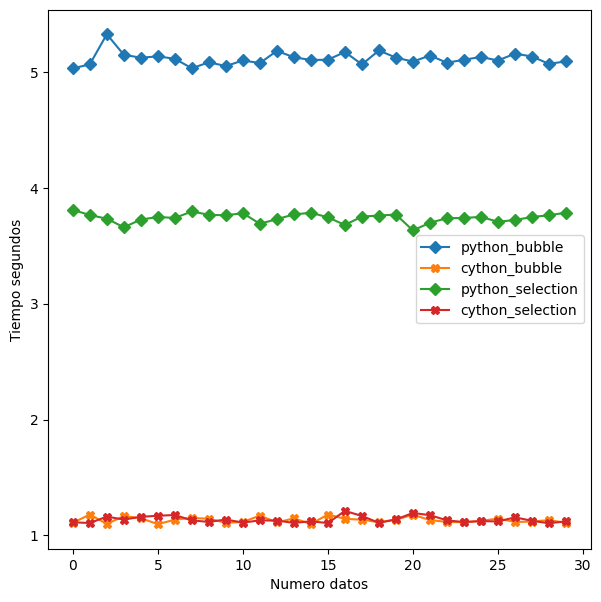

In [3]:
plt.figure(figsize=(7,7))
plt.plot(df_10000.time_python_bubble,'D-')
plt.plot(df_10000.time_cython_bubble,'X-')
plt.plot(df_10000.time_python_selection,'D-')
plt.plot(df_10000.time_cython_selection,'X-')
plt.legend(['python_bubble','cython_bubble','python_selection','cython_selection'])
plt.ylabel('Tiempo segundos')
plt.xlabel('Numero datos')

In [4]:
median_df_10000 = pd.DataFrame(df_10000.apply(lambda x: x.median()), columns=['median_time'])
median_df_10000

,median_time
time_python_bubble,5.106320
time_cython_bubble,1.131682
time_python_selection,3.748602
time_cython_selection,1.127962


In [5]:
fig = px.bar(median_df_10000, x=median_df_10000.median_time, color=median_df_10000.index.values,title='Promedio Tiempo', text_auto=True)
fig.show()

In [24]:
print(f'SELECTION SORT: Cython es {median_df_10000.median_time[0]/median_df_10000.median_time[1]} veces mas rapido que Python')
print(f'BUBBLE SORT: Cython es {median_df_10000.median_time[2]/median_df_10000.median_time[3]} veces mas rapido que Python')

SELECTION SORT: Cython es 4.512148946369676 veces mas rapido que Python
BUBBLE SORT: Cython es 3.3233396500326915 veces mas rapido que Python


<b>20000 Datos

In [6]:
df_20000 = pd.read_csv('/work/sort_30000.csv')
df_20000.head()

,time_python_bubble,time_cython_bubble,time_python_selection,time_cython_selection
0,47.04187,11.069083,36.499726,11.302622
1,47.64835,10.964060,36.357983,11.328328
2,48.09801,11.016647,36.637252,11.233850
3,47.52529,11.028876,36.202729,11.260350
4,47.70003,11.005762,36.702312,11.410845


Text(0.5, 0, 'Numero datos')

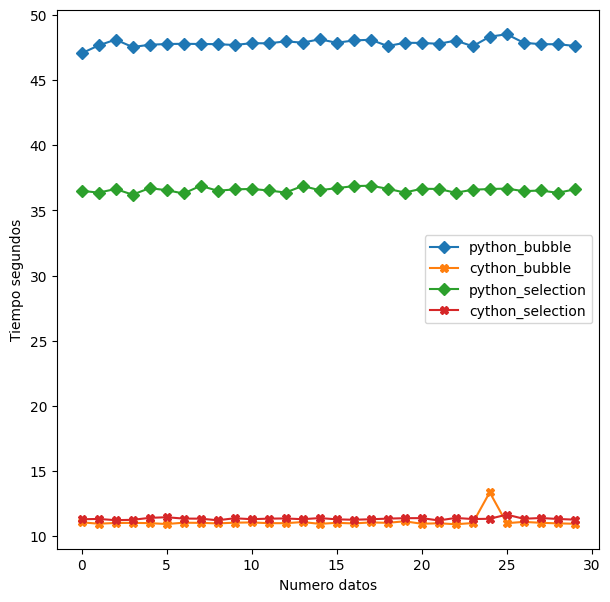

In [7]:
plt.figure(figsize=(7,7))
plt.plot(df_20000.time_python_bubble,'D-')
plt.plot(df_20000.time_cython_bubble,'X-')
plt.plot(df_20000.time_python_selection,'D-')
plt.plot(df_20000.time_cython_selection,'X-')
plt.legend(['python_bubble','cython_bubble','python_selection','cython_selection'])
plt.ylabel('Tiempo segundos')
plt.xlabel('Numero datos')

In [8]:
median_df_20000 = pd.DataFrame(df_20000.apply(lambda x: x.median()), columns=['median_time'])
median_df_20000

,median_time
time_python_bubble,47.791685
time_cython_bubble,11.013638
time_python_selection,36.594865
time_cython_selection,11.340702


In [9]:
fig = px.bar(median_df_20000, x=median_df_20000.median_time, color=median_df_20000.index.values,title='Promedio Tiempo', text_auto=True)
fig.show()

In [25]:
print(f'SELECTION SORT: Cython es {median_df_20000.median_time[0]/median_df_20000.median_time[1]} veces mas rapido que Python')
print(f'BUBBLE SORT: Cython es {median_df_20000.median_time[2]/median_df_20000.median_time[3]} veces mas rapido que Python')

SELECTION SORT: Cython es 4.339318670179645 veces mas rapido que Python
BUBBLE SORT: Cython es 3.2268605494236358 veces mas rapido que Python


<b>30000 Datos

In [10]:
df_30000 = pd.read_csv('/work/sort_30000.csv')
df_30000.head()

,time_python_bubble,time_cython_bubble,time_python_selection,time_cython_selection
0,47.04187,11.069083,36.499726,11.302622
1,47.64835,10.964060,36.357983,11.328328
2,48.09801,11.016647,36.637252,11.233850
3,47.52529,11.028876,36.202729,11.260350
4,47.70003,11.005762,36.702312,11.410845


Text(0.5, 0, 'Numero datos')

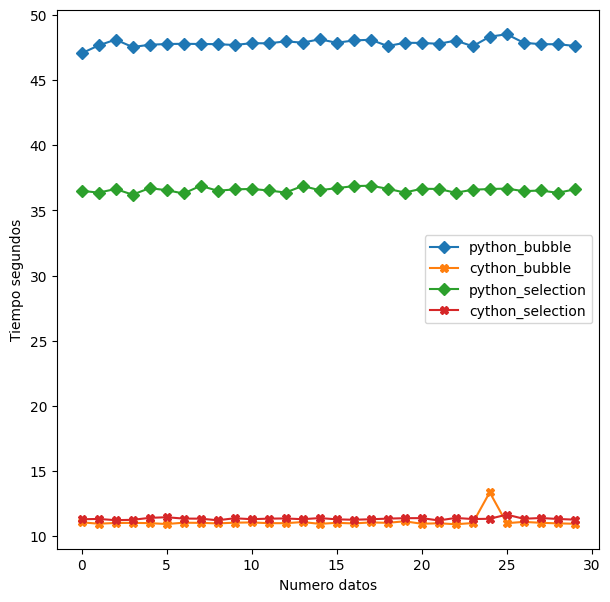

In [11]:
plt.figure(figsize=(7,7))
plt.plot(df_30000.time_python_bubble,'D-')
plt.plot(df_30000.time_cython_bubble,'X-')
plt.plot(df_30000.time_python_selection,'D-')
plt.plot(df_30000.time_cython_selection,'X-')
plt.legend(['python_bubble','cython_bubble','python_selection','cython_selection'])
plt.ylabel('Tiempo segundos')
plt.xlabel('Numero datos')

In [12]:
median_df_30000 = pd.DataFrame(df_30000.apply(lambda x: x.median()), columns=['median_time'])
median_df_30000

,median_time
time_python_bubble,47.791685
time_cython_bubble,11.013638
time_python_selection,36.594865
time_cython_selection,11.340702


In [13]:
fig = px.bar(median_df_30000, x=median_df_30000.median_time, color=median_df_30000.index.values,title='Promedio Tiempo', text_auto=True)
fig.show()

In [26]:
print(f'SELECTION SORT: Cython es {median_df_30000.median_time[0]/median_df_30000.median_time[1]} veces mas rapido que Python')
print(f'BUBBLE SORT: Cython es {median_df_30000.median_time[2]/median_df_30000.median_time[3]} veces mas rapido que Python')

SELECTION SORT: Cython es 4.339318670179645 veces mas rapido que Python
BUBBLE SORT: Cython es 3.2268605494236358 veces mas rapido que Python


### Conclusiones

- Cython es mucho mas eficiente que Python, siendo hasta 4.5 veces mas rapido que Python.
- Bubble sort escrito en Python puro no es el algoritmo de ordenamiento mas eficiente, a pesar de que tanto bubble como selection tienen la misma complejidad O(n^2).
- Python puro no es un lenguaje efiente.
- Cython es el lenguaje ideal para empaquetar bibliotecas C externas, acelerando la ejecucion de codigo python.

### Referencias

[1] https://cython.org/#about
[2] https://www.programiz.com/dsa/bubble-sort
[3] https://www.geeksforgeeks.org/python-program-for-selection-sort/#:~:text=The%20selection%20sort%20algorithm%20sorts,Remaining%20subarray%20which%20is%20unsorted.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6494161e-dfb7-4550-b8f1-42f2b6ae9db9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>